<a href="https://colab.research.google.com/github/Haeun-Oh/Deep-Learning/blob/main/7.%20AutoEncoder/7_3_Denoising_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6MB 57kB/s 
     |████████████████████████████████| 368kB 35.3MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 3.2MB 43.1MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'1.13.1'

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 1 cost =  0.066330423
Epoch: 2 cost =  0.046712372
Epoch: 3 cost =  0.042576549
Epoch: 4 cost =  0.040492560
Epoch: 5 cost =  0.039213421
Epoch: 6 cost =  0.038324385
Epoch: 7 cost =  0.037306848
Epoch: 8 cost =  0.036179615
Epoch: 9 cost =  0.035458115
Epoch: 10 cost =  0.035139004
Epoch: 11 cost =  0.034915442
Epoch: 12 cost =  0.034639510
Epoch: 13 cost =  0.034291158
Epoch: 14 cost =  0.034076233
Epoch: 15 cost =  0.033951551
Epoch: 16 cost =  0.033497955
Epoch: 17 cost =  0.033130065
Epoch: 18 cost =  0.032895726
Epoch: 19 cost =  0.032755432
Epoch: 20 cost =  0.032552214


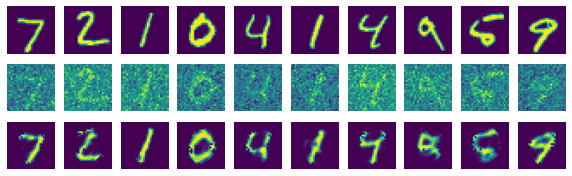

In [ ]:
# Denosing Autoencoder
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

batch_size = 100
learning_rate = 0.01
epoch_num = 20
n_input = 28*28
n_hidden = 256
noise_level = 0.6

X_noisy = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_uniform([n_input, n_hidden], -1., 1.))
b_encode = tf.Variable(tf.random_uniform([n_hidden], -1., 1.))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X_noisy, W_encode), b_encode))

W_decode = tf.Variable(tf.random_uniform([n_hidden, n_input], -1., 1.))
b_decode = tf.Variable(tf.random_uniform([n_input], -1., 1.))

decoder = tf.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.square(Y-decoder))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)

    for epoch in range(epoch_num):
        avg_cost = 0    
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_x_noisy = batch_xs + noise_level * np.random.normal(loc=0.0, scale=1.0, size=batch_xs.shape)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X_noisy:batch_x_noisy, Y: batch_xs})
            avg_cost += cost_val/total_batch
        print('Epoch:', '%d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))
    
    test_X = mnist.test.images[:10] + noise_level * np.random.normal(loc=0.0, scale=1.0, size=mnist.test.images[:10].shape)
    
    samples = sess.run(decoder, feed_dict={X_noisy: test_X})
    fig, ax = plt.subplots(3, 10, figsize=(10, 3))

    for i in range(10):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[2][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
        ax[1][i].imshow(np.reshape(test_X[i], (28,28)))
        ax[2][i].imshow(np.reshape(samples[i], (28,28)))
    plt.show()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 1 cost =  0.065491460
Epoch: 2 cost =  0.047093268
Epoch: 3 cost =  0.042366865
Epoch: 4 cost =  0.039094560
Epoch: 5 cost =  0.036859855
Epoch: 6 cost =  0.035522816
Epoch: 7 cost =  0.033962446
Epoch: 8 cost =  0.033302534
Epoch: 9 cost =  0.032720807
Epoch: 10 cost =  0.032228404
Epoch: 11 cost =  0.031907887
Epoch: 12 cost =  0.031518719
Epoch: 13 cost =  0.031255034
Epoch: 14 cost =  0.030855028
Epoch: 15 cost =  0.030617579
Epoch: 16 cost =  0.030494833
Epoch: 17 cost =  0.030224294
Epoch: 18 cost =  0.030156994
Epoch: 19 cost =  0.029906439
Epoch: 20 cost =  0.029893588


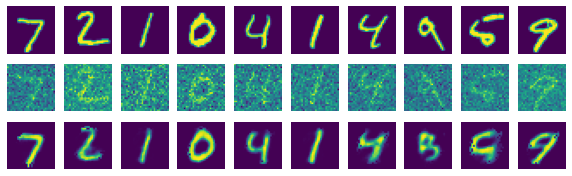

In [ ]:
# Denosing Stacked Autoencoder

import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

batch_size = 100
learning_rate = 0.01
epoch_num = 20
n_input = 28*28
n_hidden1 = 256
n_hidden2 = 128
noise_level = 0.6

X_noisy = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_input])

W_encode1 = tf.Variable(tf.random_uniform([n_input, n_hidden1], -1., 1.))
b_encode1 = tf.Variable(tf.random_uniform([n_hidden1], -1., 1.))

encoder_h1 = tf.nn.sigmoid(tf.add(tf.matmul(X_noisy, W_encode1), b_encode1))

W_encode2 = tf.Variable(tf.random_uniform([n_hidden1, n_hidden2], -1., 1.))
b_encode2 = tf.Variable(tf.random_uniform([n_hidden2], -1., 1.))

encoder_h2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder_h1, W_encode2), b_encode2))

W_decode1 = tf.Variable(tf.random_uniform([n_hidden2, n_hidden1], -1., 1.))
b_decode1 = tf.Variable(tf.random_uniform([n_hidden1], -1., 1.))

decoder = tf.sigmoid(tf.add(tf.matmul(encoder_h2, W_decode1), b_decode1))

W_decode2 = tf.Variable(tf.random_uniform([n_hidden1, n_input], -1., 1.))
b_decode2 = tf.Variable(tf.random_uniform([n_input], -1., 1.))

output = tf.nn.sigmoid(tf.add(tf.matmul(decoder, W_decode2), b_decode2))

cost = tf.reduce_mean(tf.square(Y-output))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)

    for epoch in range(epoch_num):
        avg_cost = 0    
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_x_noisy = batch_xs + noise_level * np.random.normal(loc=0.0, scale=1.0, size=batch_xs.shape)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X_noisy:batch_x_noisy, Y: batch_xs})
            avg_cost += cost_val/total_batch
        print('Epoch:', '%d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))
    
    test_X = mnist.test.images[:10] + noise_level * np.random.normal(loc=0.0, scale=1.0, size=mnist.test.images[:10].shape)
    
    samples = sess.run(output, feed_dict={X_noisy: test_X})
    fig, ax = plt.subplots(3, 10, figsize=(10, 3))

    for i in range(10):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[2][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
        ax[1][i].imshow(np.reshape(test_X[i], (28,28)))
        ax[2][i].imshow(np.reshape(samples[i], (28,28)))
    plt.show()